In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1: EDA and Business Insights

Loading dataset

In [4]:
customers = pd.read_csv('/content/drive/MyDrive/Zeotap/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Zeotap/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Zeotap/Transactions.csv')

In [5]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

Merge datasets for analysis

In [6]:
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

1. Transactions by Region

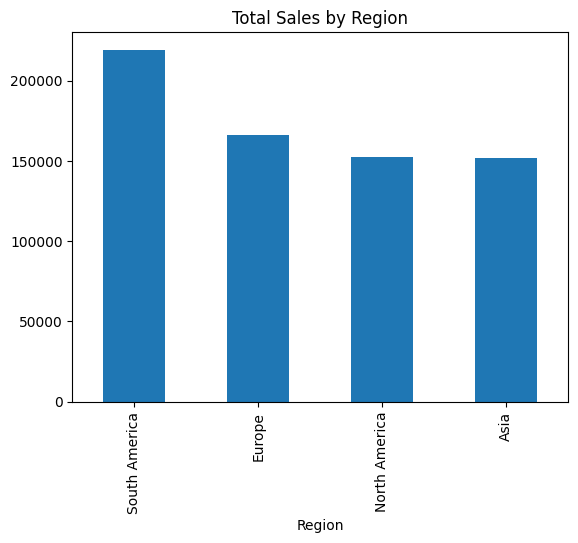

In [7]:
region_sales = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
region_sales.plot(kind="bar", title="Total Sales by Region")
plt.show()

2. Top Products by Sales

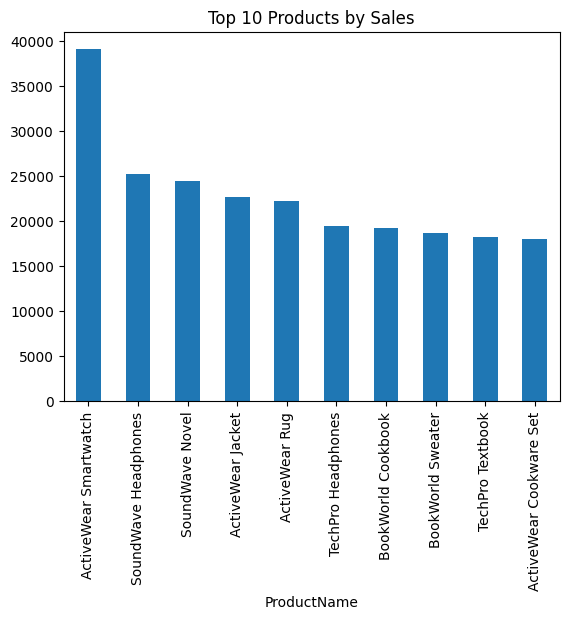

In [8]:
top_products = data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", title="Top 10 Products by Sales")
plt.show()

3. Customer Signup Trend

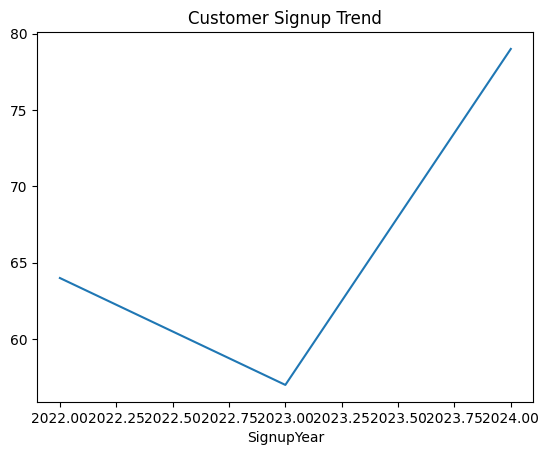

In [9]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
customers["SignupYear"] = customers["SignupDate"].dt.year
signup_trend = customers.groupby("SignupYear")["CustomerID"].count()
signup_trend.plot(kind="line", title="Customer Signup Trend")
plt.show()

4. Average Transaction Value by Category

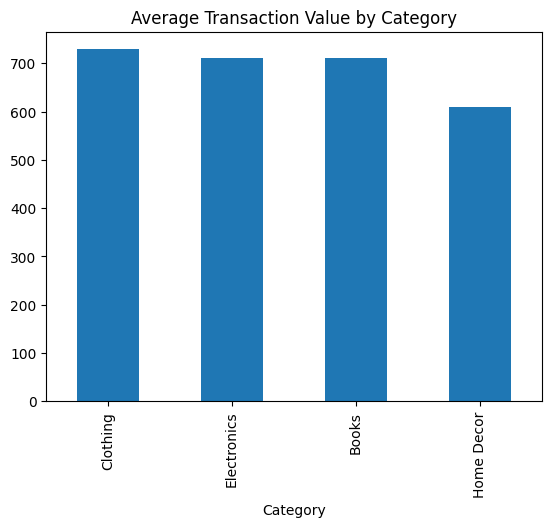

In [10]:
category_avg = data.groupby("Category")["TotalValue"].mean().sort_values(ascending=False)
category_avg.plot(kind="bar", title="Average Transaction Value by Category")
plt.show()

5. Quantity Sold by Product Category

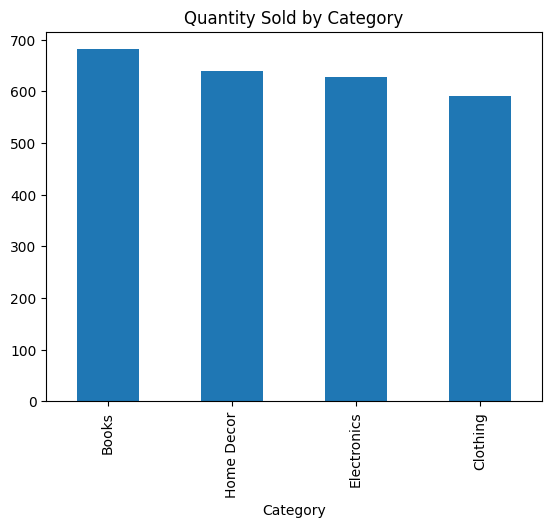

In [11]:
category_quantity = data.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
category_quantity.plot(kind="bar", title="Quantity Sold by Category")
plt.show()